# **Part 2 - Supervised Learning Using Tree-Based Model**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
vehicleInsuranceData = pd.read_csv("ClaimsData.csv")
display(vehicleInsuranceData)



# 'Category' is assumed to represent the vehicle category, 'AgeP' is assumed to represent the age of the driver,
# 'ModelYear' is assumed to represent the vehicle model year,
# 'PreOwned' is assumed to represent whether the vehicle is pre-owned or not, and 'ServHist' is assumed to represent service history.

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes
...,...,...,...,...,...,...,...
1495,19440.23,Sedan,97675.4,42,2012,No,Yes
1496,20230.45,Small,163871.9,53,2016,No,Yes
1497,26929.63,Sedan,66468.7,72,2017,No,No
1498,35422.28,SAV,94859.3,47,2018,No,Yes


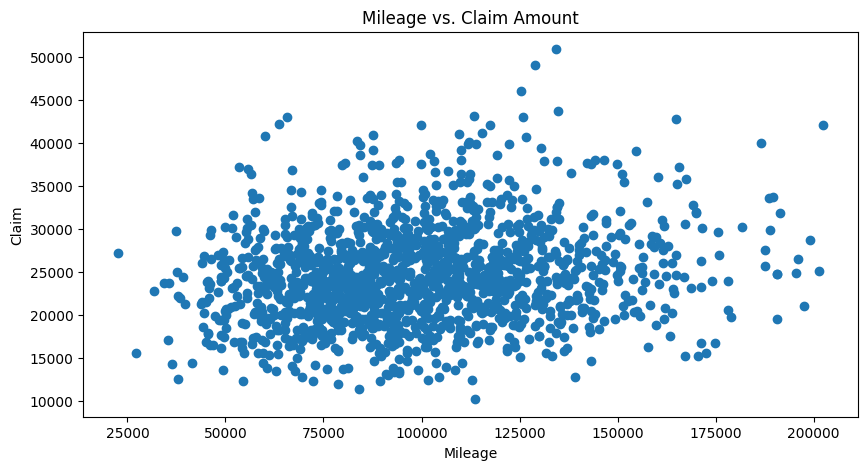

In [33]:
# EDA: Scatterplot 1 (Mileage vs. Claim Amount)
plt.figure(figsize=(10, 5))
plt.scatter(vehicleInsuranceData['Mileage'], vehicleInsuranceData['Claim'])
plt.title("Mileage vs. Claim Amount")
plt.xlabel("Mileage")
plt.ylabel("Claim")
plt.show()


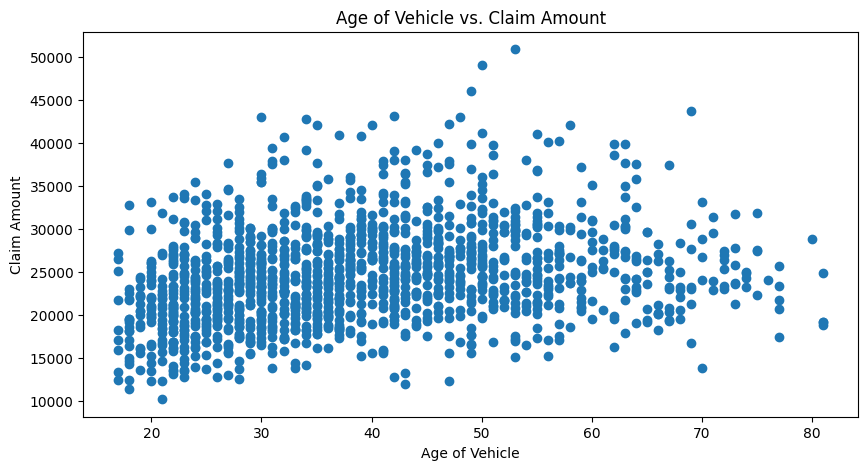

In [34]:
# EDA: Scatterplot 2 (Age of Vehicle vs. Claim Amount)
plt.figure(figsize=(10, 5))
plt.scatter(vehicleInsuranceData['AgeP'], vehicleInsuranceData['Claim'])
plt.title("Age of Vehicle vs. Claim Amount")
plt.xlabel("Age of Vehicle")
plt.ylabel("Claim Amount")
plt.show()


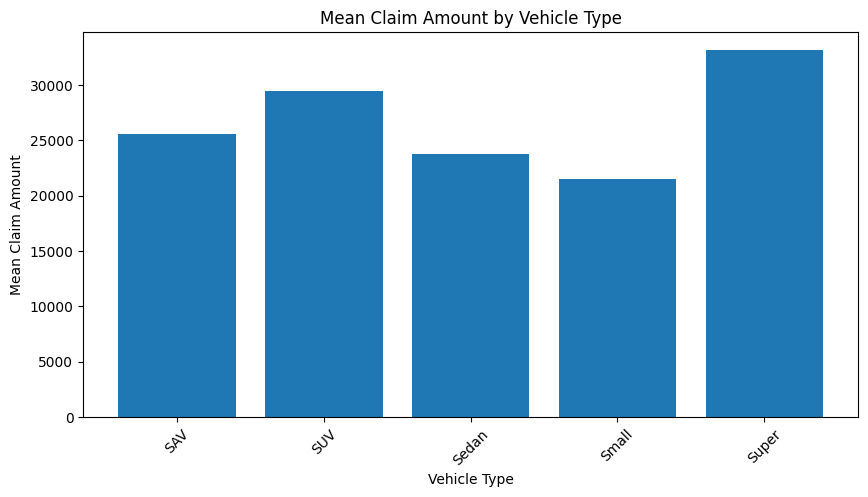

In [35]:
# EDA: Bar Graph 1 (Vehicle Type vs. Mean Claim Amount)
vehicle_type_mean_claim = vehicleInsuranceData.groupby('Category')['Claim'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(vehicle_type_mean_claim['Category'], vehicle_type_mean_claim['Claim'])
plt.title("Mean Claim Amount by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Mean Claim Amount")
plt.xticks(rotation=45)
plt.show()


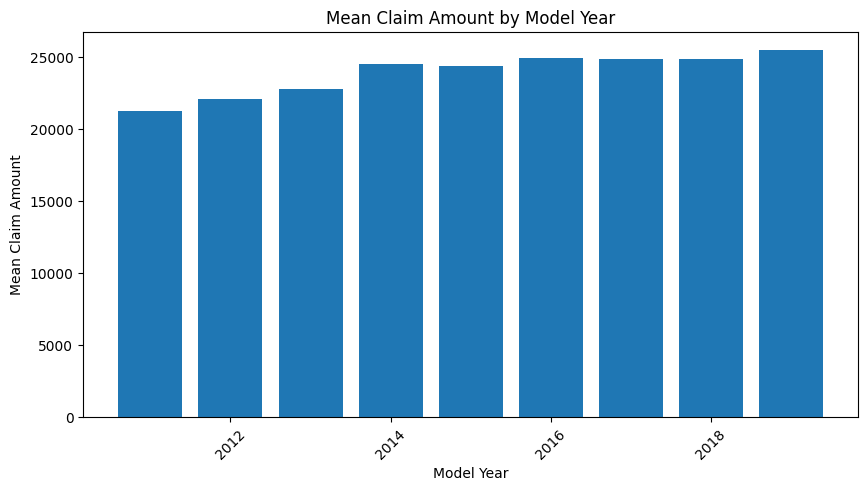

In [36]:
# EDA: Bar Graph 2 (Model Year vs. Mean Claim Amount)
model_year_mean_claim = vehicleInsuranceData.groupby('ModelYear')['Claim'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(model_year_mean_claim['ModelYear'], model_year_mean_claim['Claim'])
plt.title("Mean Claim Amount by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Mean Claim Amount")
plt.xticks(rotation=45)
plt.show()


In [37]:
# EDA: Calculation 1 (Mean Claim Amount by Vehicle Category)
vehicle_category_mean_claim = vehicleInsuranceData.groupby('Category')['Claim'].mean()
print("Mean Claim Amount by Vehicle Category:")
print(vehicle_category_mean_claim)


Mean Claim Amount by Vehicle Category:
Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [38]:
# EDA: Calculation 2 (Mean Claim Amount by Model Year)
model_year_mean_claim = vehicleInsuranceData.groupby('ModelYear')['Claim'].mean()
print("\nMean Claim Amount by Model Year:")
print(model_year_mean_claim)


Mean Claim Amount by Model Year:
ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


In [39]:
# Select features (X) and the target variable (y)
X = vehicleInsuranceData[['Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned', 'ServHist']]
y = vehicleInsuranceData['Claim']


In [40]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Category', 'PreOwned', 'ServHist'], drop_first=True)


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [42]:
# Fit the decision tree regressor with a specified maximum depth
regressor = DecisionTreeRegressor(max_depth=2)  # Depth of the Tree, until what node Should the agent go
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [43]:
# Generate a textual representation of the decision tree
tree_rules = export_text(regressor, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- PreOwned_Yes <= 0.50
|   |--- AgeP <= 33.50
|   |   |--- value: [21548.09]
|   |--- AgeP >  33.50
|   |   |--- value: [25001.91]
|--- PreOwned_Yes >  0.50
|   |--- Category_SUV <= 0.50
|   |   |--- value: [26448.34]
|   |--- Category_SUV >  0.50
|   |   |--- value: [32150.36]



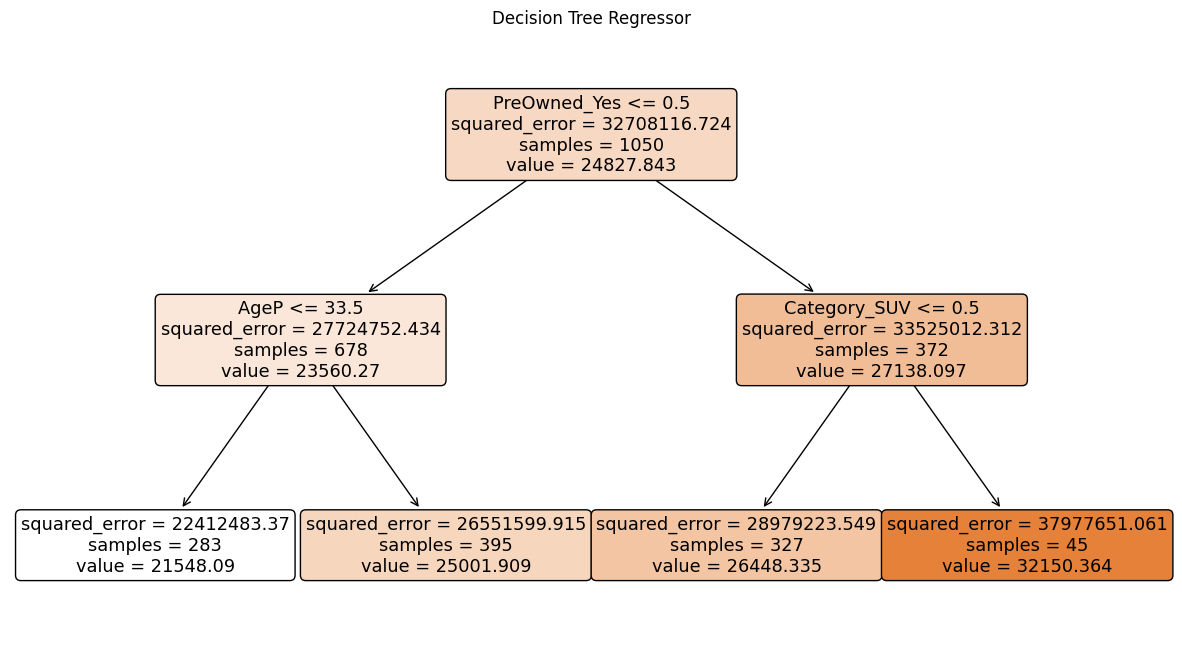

In [44]:

# decision tree visualization
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [45]:

# Evaluate the model on the test data
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.2f}")

Mean Squared Error on Test Data: 24924001.90
